#Deep learning multi-classification

CIFAR-10 dataset consistis of 6 millions of class, those images 32x32 colours

site: https://www.cs.toronto.edu/~kriz/cifar.html

In [18]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [7]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import keras
print("Keras version:", keras.__version__)

TensorFlow version: 2.17.0
Keras version: 3.4.1


In [29]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [30]:
X_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
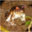

In [13]:
X_train[0]

In [31]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train.shape

(50000, 32, 32, 3)

In [32]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [33]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [34]:
# convert 0..9 number one hot encode
class_train = to_categorical(y_train, num_classes=10)
class_test = to_categorical(y_test, num_classes=10)
class_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [35]:
multiclassificator = Sequential()
# standarlization image to 32x32, all images are different size
# 3 channel RGB
multiclassificator.add(InputLayer(shape=(32,32,3)))
multiclassificator.add(Conv2D(32, (3, 3), activation='relu'))
multiclassificator.add(BatchNormalization())
multiclassificator.add(MaxPooling2D(pool_size=(2, 2)))

multiclassificator.add(Conv2D(32, (3, 3), activation='relu'))
multiclassificator.add(BatchNormalization())
multiclassificator.add(MaxPooling2D(pool_size=(2, 2)))

multiclassificator.add(Flatten())

multiclassificator.add(Dense(128, activation='relu'))
multiclassificator.add(Dropout(0.2))
multiclassificator.add(Dense(128, activation='relu'))
multiclassificator.add(Dropout(0.2))
multiclassificator.add(Dense(10, activation='softmax'))
multiclassificator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 13, 13, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175,786 (686.66 KB)

 Trainable params: 175,658 (686.16 KB)

 Non-trainable params: 128 (512.00 B)

In [36]:
multiclassificator.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

In [37]:
multiclassificator.fit(X_train,
                       class_train,
                       batch_size=64,
                       epochs=10,
                       validation_data=(X_test, class_test),
                       verbose = 1)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 93ms/step - accuracy: 0.3550 - loss: 1.8214 - val_accuracy: 0.4706 - val_loss: 1.4833
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.5795 - loss: 1.2008 - val_accuracy: 0.5213 - val_loss: 1.4320
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 93ms/step - accuracy: 0.6474 - loss: 1.0109 - val_accuracy: 0.5085 - val_loss: 1.5574
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.6858 - loss: 0.9028 - val_accuracy: 0.4754 - val_loss: 1.6784
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 94ms/step - accuracy: 0.7155 - loss: 0.8084 - val_accuracy: 0.5999 - val_loss: 1.2637
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 93ms/step - accuracy: 0.7373 - loss: 0.7459 - val_accuracy: 0.5010 - val_loss: 1.7261
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.7564 - loss: 0.6885 - val_accuracy: 0.6653 - val_loss: 0.9889
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 98ms/step - accuracy: 0.7730 - loss: 0.6369 - 

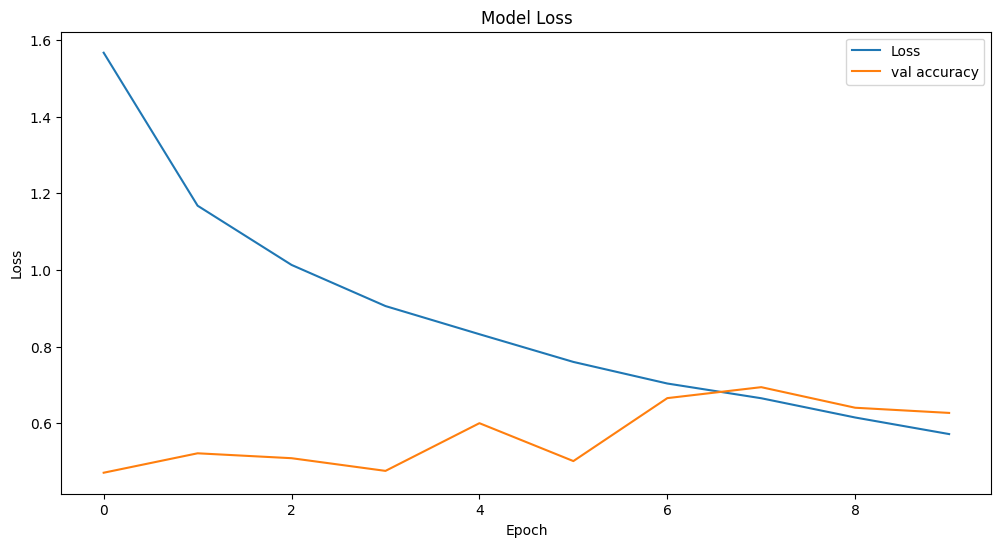

In [38]:

plt.figure(figsize=(12, 6))
plt.plot(multiclassificator.history.history['loss'], label='Loss')
plt.plot(multiclassificator.history.history['val_accuracy'], label='val accuracy')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
